In [1]:
%cd "/content/drive/MyDrive/Dacon/신용카드 사기 거래 탐지"

/content/drive/MyDrive/Dacon/신용카드 사기 거래 탐지


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import RobustScaler, Normalizer
from sklearn.pipeline import Pipeline

from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


import warnings
warnings.filterwarnings(action='ignore')

In [3]:
train_df = pd.read_csv('train.csv') # Train
train_df.head()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
0,3,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,-0.994972
1,4,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,-0.994972
2,6,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,-0.256131,-0.994960
3,8,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,0.262698,-0.994901
4,9,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,0.994900,-0.994901


In [102]:
val_df = pd.read_csv('val.csv') # Validation
val_df.head()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,V29,V30,Class
0,10,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,-0.255991,-0.994878,0
1,22,0.962496,0.328461,-0.171479,2.109204,1.129566,1.696038,0.107712,0.521502,-1.191311,...,0.402492,-0.048508,-1.371866,0.390814,0.199964,0.016371,-0.014605,0.168937,-0.994784,0
2,63,1.145524,0.575068,0.194008,2.598192,-0.092210,-1.044430,0.531588,-0.241888,-0.896287,...,-0.119703,-0.076510,0.691320,0.633984,0.048741,-0.053192,0.016251,0.169496,-0.994502,0
3,69,0.927060,-0.323684,0.387585,0.544474,0.246787,1.650358,-0.427576,0.615371,0.226278,...,0.079359,0.096632,-0.992569,0.085096,0.377447,0.036096,-0.005960,0.331307,-0.994467,0
4,83,-3.005237,2.600138,1.483691,-2.418473,0.306326,-0.824575,2.065426,-1.829347,4.009259,...,-0.181268,-0.163747,0.515821,0.136318,0.460054,-0.251259,-1.105751,-0.287012,-0.994373,0


In [5]:
print(train_df.shape, val_df.shape)

(113842, 31) (28462, 32)


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113842 entries, 0 to 113841
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      113842 non-null  int64  
 1   V1      113842 non-null  float64
 2   V2      113842 non-null  float64
 3   V3      113842 non-null  float64
 4   V4      113842 non-null  float64
 5   V5      113842 non-null  float64
 6   V6      113842 non-null  float64
 7   V7      113842 non-null  float64
 8   V8      113842 non-null  float64
 9   V9      113842 non-null  float64
 10  V10     113842 non-null  float64
 11  V11     113842 non-null  float64
 12  V12     113842 non-null  float64
 13  V13     113842 non-null  float64
 14  V14     113842 non-null  float64
 15  V15     113842 non-null  float64
 16  V16     113842 non-null  float64
 17  V17     113842 non-null  float64
 18  V18     113842 non-null  float64
 19  V19     113842 non-null  float64
 20  V20     113842 non-null  float64
 21  V21     11

In [7]:
val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28462 entries, 0 to 28461
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      28462 non-null  int64  
 1   V1      28462 non-null  float64
 2   V2      28462 non-null  float64
 3   V3      28462 non-null  float64
 4   V4      28462 non-null  float64
 5   V5      28462 non-null  float64
 6   V6      28462 non-null  float64
 7   V7      28462 non-null  float64
 8   V8      28462 non-null  float64
 9   V9      28462 non-null  float64
 10  V10     28462 non-null  float64
 11  V11     28462 non-null  float64
 12  V12     28462 non-null  float64
 13  V13     28462 non-null  float64
 14  V14     28462 non-null  float64
 15  V15     28462 non-null  float64
 16  V16     28462 non-null  float64
 17  V17     28462 non-null  float64
 18  V18     28462 non-null  float64
 19  V19     28462 non-null  float64
 20  V20     28462 non-null  float64
 21  V21     28462 non-null  float64
 22

결측치 없음

In [26]:
tmp = val_df['Class'].value_counts().to_frame().reset_index()
tmp['Percent(%)'] = tmp["Class"].apply(lambda x : round(100*float(x) / len(val_df), 2))
tmp = tmp.rename(columns = {"index" : "Target", "Class" : "Count"})
tmp

,Target,Count,Percent(%)
0,0,28432,99.89
1,1,30,0.11


In [27]:
train_df.describe()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
count,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,...,113842.000000,1.138420e+05,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000
mean,142025.527837,0.000197,0.001289,0.009717,-0.004169,0.000475,0.005141,0.005769,-0.002451,-0.002107,...,-0.001242,4.088347e-07,-0.001317,-0.000884,0.001680,-0.000293,-0.000234,-0.000508,0.927253,0.116232
std,82248.545392,1.951060,1.651064,1.496916,1.412633,1.367533,1.330583,1.204111,1.185504,1.095415,...,0.722001,7.238291e-01,0.636061,0.605854,0.520069,0.480979,0.399505,0.356130,3.412933,0.558161
min,3.000000,-56.407510,-72.715728,-32.454198,-5.600607,-42.147898,-26.160506,-41.506796,-50.943369,-13.434066,...,-22.757540,-8.887017e+00,-44.807735,-2.824849,-10.295397,-1.855355,-9.895244,-9.617915,-0.307413,-0.994972
25%,70796.750000,-0.923479,-0.595602,-0.883877,-0.853728,-0.689853,-0.766094,-0.552071,-0.209492,-0.647477,...,-0.229710,-5.402665e-01,-0.162180,-0.355582,-0.315470,-0.326160,-0.070847,-0.053249,-0.230560,-0.360304
50%,141722.000000,0.012074,0.066390,0.183868,-0.019359,-0.054060,-0.272436,0.039036,0.020970,-0.052157,...,-0.030281,8.345807e-03,-0.012261,0.040573,0.018278,-0.052815,0.001502,0.011158,-0.000699,-0.002590
75%,213359.500000,1.315373,0.801687,1.037120,0.742208,0.614214,0.405285,0.568750,0.328303,0.590705,...,0.186001,5.287508e-01,0.147474,0.438225,0.353989,0.240838,0.091279,0.077851,0.768532,0.640653
max,284803.000000,2.454930,21.467203,4.187811,16.491217,34.801666,23.917837,44.054461,20.007208,10.392889,...,27.202839,8.361985e+00,22.528412,4.022866,7.519589,3.119295,11.135740,33.847808,180.101027,1.034951


In [28]:
val_df.describe()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,V29,V30,Class
count,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,...,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000
mean,142549.840138,0.004967,0.002014,0.001414,0.001893,-0.003969,-0.017730,0.005556,0.009023,-0.004905,...,0.001224,0.001490,0.001355,0.002284,0.000520,-0.000520,-0.000265,0.924010,0.119916,0.001054
std,82252.851474,1.930640,1.605198,1.499749,1.405139,1.335147,1.292214,1.165132,1.103538,1.090843,...,0.721350,0.588076,0.603181,0.526864,0.484804,0.394235,0.304284,3.347555,0.558246,0.032449
min,10.000000,-29.516123,-38.305310,-30.177317,-5.071241,-21.577019,-16.172614,-31.197329,-26.278007,-9.462573,...,-8.555808,-25.356744,-2.807897,-6.035054,-1.596493,-9.793568,-8.364853,-0.307413,-0.994878,0.000000
25%,71260.000000,-0.915525,-0.598053,-0.873022,-0.852444,-0.698010,-0.774920,-0.546290,-0.210941,-0.642760,...,-0.542624,-0.160418,-0.352310,-0.322098,-0.328638,-0.071787,-0.052361,-0.226927,-0.357884,0.000000
50%,142683.500000,0.023586,0.075470,0.175784,-0.021619,-0.052780,-0.280742,0.046280,0.022622,-0.066623,...,0.008401,-0.011372,0.040076,0.016684,-0.049583,0.000488,0.012138,0.005589,0.002156,0.000000
75%,213612.750000,1.315578,0.803463,1.011563,0.739044,0.598712,0.377266,0.566825,0.323836,0.596308,...,0.528163,0.146094,0.441402,0.352930,0.241051,0.089100,0.080822,0.778278,0.641828,0.000000
max,284806.000000,2.411769,16.497472,4.226108,12.114672,24.345310,12.128950,26.237722,12.431140,7.937413,...,6.090514,18.946734,3.658746,5.525093,3.067907,8.708972,15.726807,165.948299,1.034975,1.000000


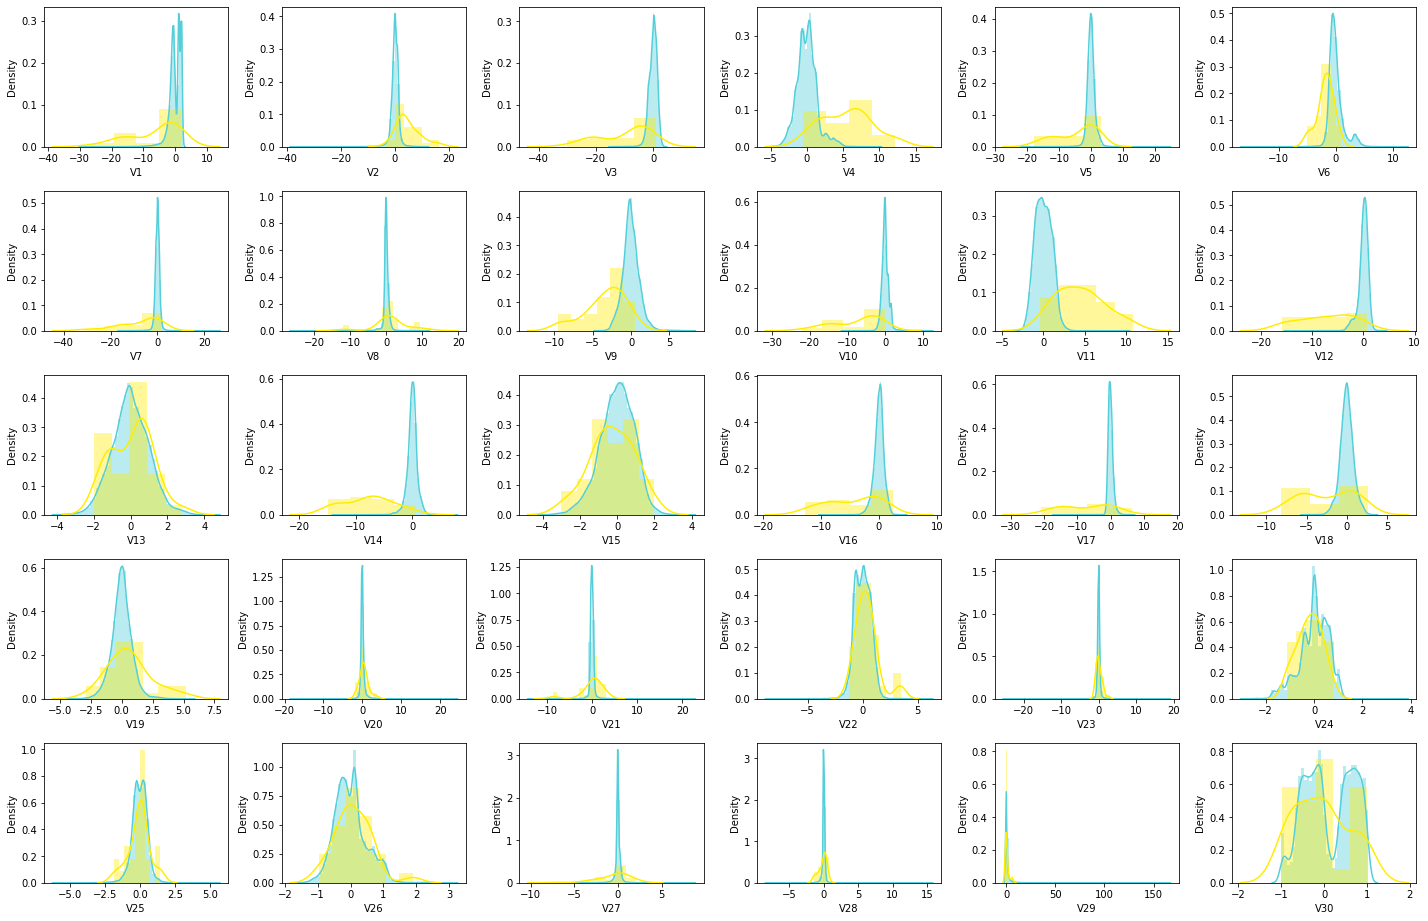

In [32]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(val_df.iloc[:,1:-1].columns):
  plt.subplot(6, 6, i + 1)
  sns.distplot(val_df[val_df["Class"] == 0][col], color = '#53CFDA')
  sns.distplot(val_df[val_df["Class"] == 1][col], color = '#FFED00')
  # plt.legend(["Class == 1", "Class == 0"])
  plt.tight_layout(True)
plt.show()

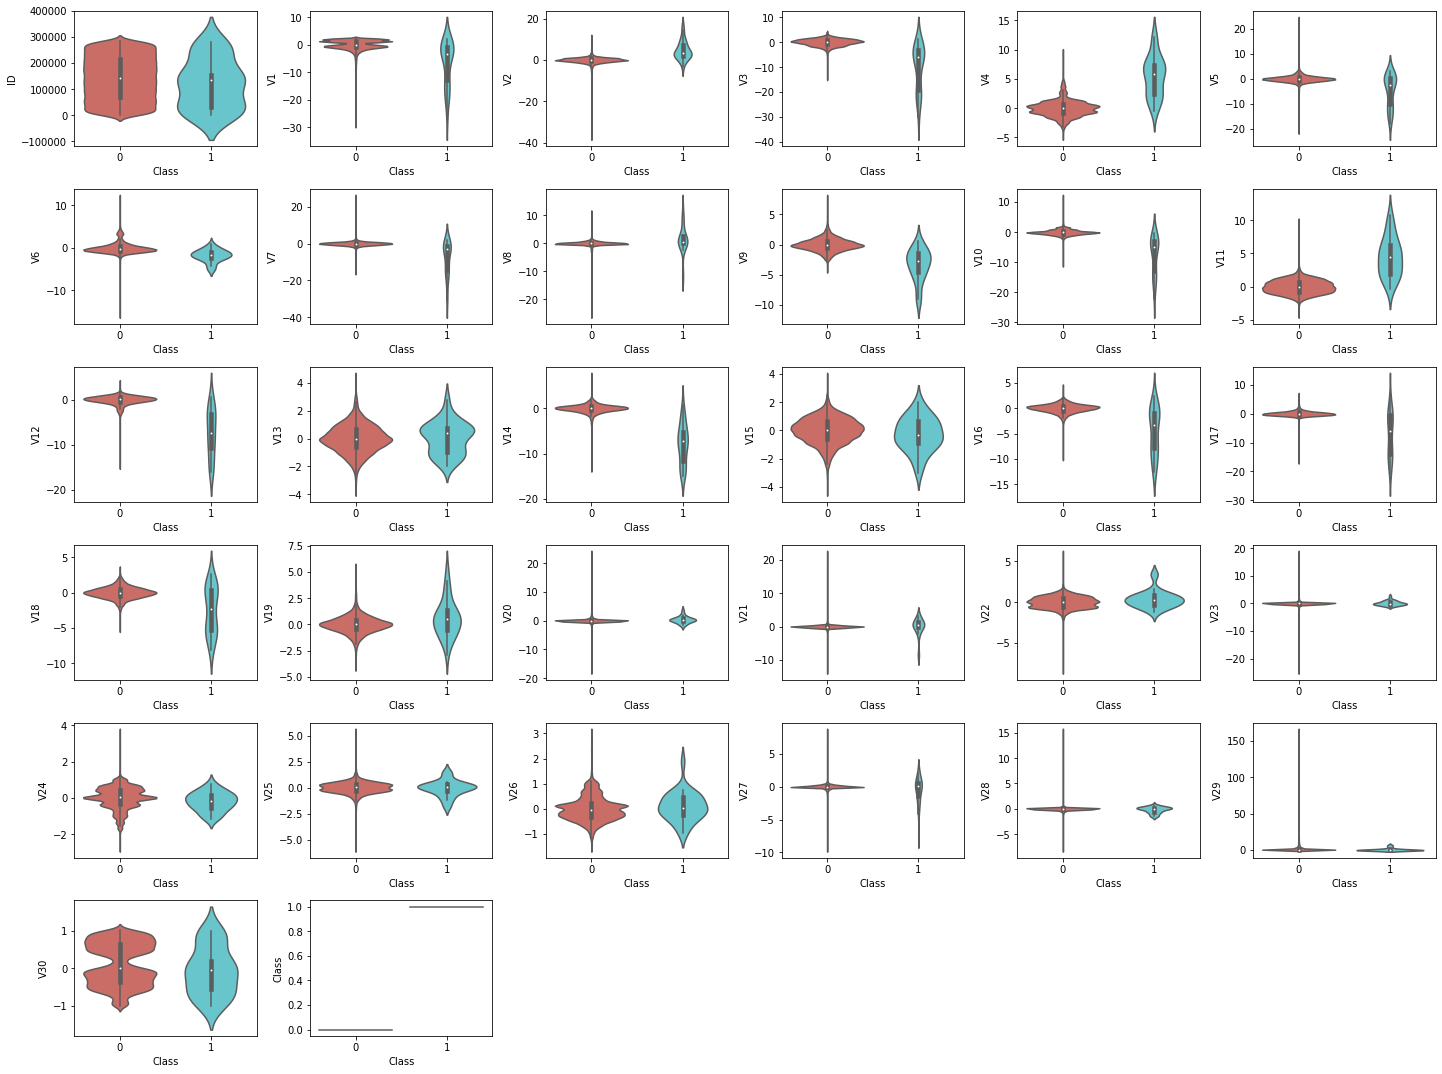

In [33]:
plt.figure(figsize=(20, 15))
for i in range(len(val_df.columns)):
    plt.subplot(6, 6, i+1)
    sns.violinplot(val_df['Class'], val_df[val_df.columns[i]], palette = 'hls')
plt.tight_layout(True)
plt.show()

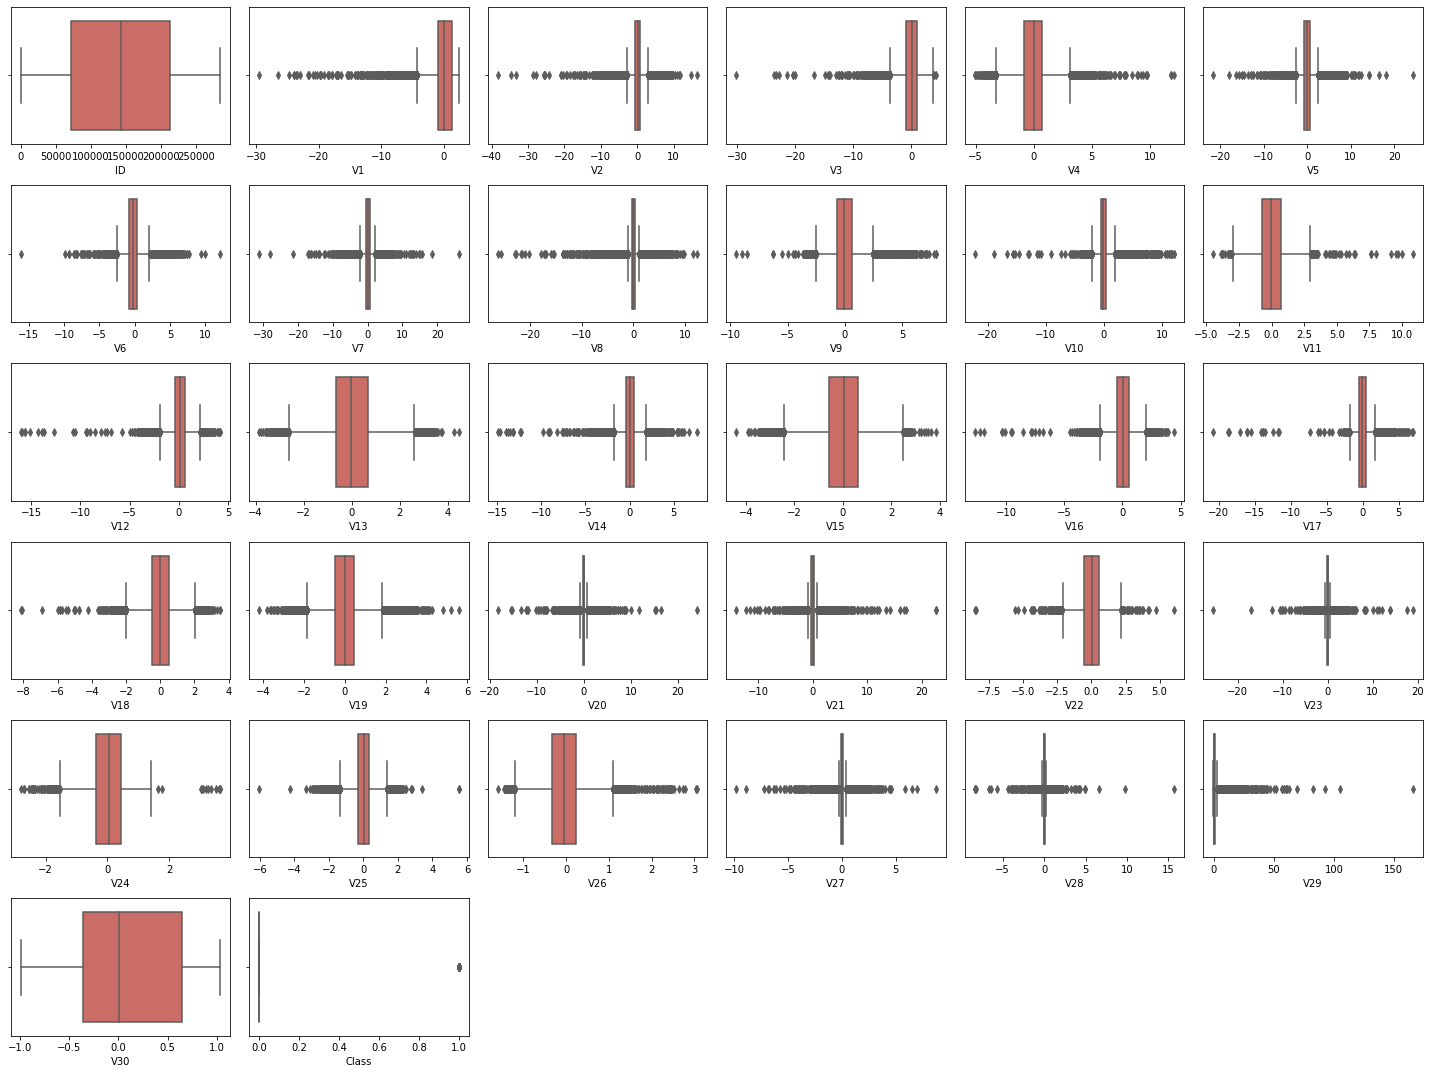

In [35]:
plt.figure(figsize=(20, 15))
for i in range(len(val_df.columns)):
    plt.subplot(6, 6, i+1)
    sns.boxplot(val_df[val_df.columns[i]], palette = 'hls')
plt.tight_layout(True)
plt.show()

In [38]:
val_normal, val_fraud = val_df['Class'].value_counts()
val_contamination = val_fraud / val_normal
print(f'Validation contamination : [{val_contamination}]') # 검증데이터의 사기비율

Validation contamination : [0.0010551491277433877]


In [40]:
train_x = train_df.drop(columns=['ID']) # Input Data

In [41]:
val_x = val_df.drop(columns=['ID', 'Class']) # Input Data
val_y = val_df['Class'] # Label

In [42]:
def get_pred_label(model_pred):
    # IsolationForest 모델 출력 (1:정상, -1:불량(사기)) 이므로 (0:정상, 1:불량(사기))로 Label 변환
    model_pred = np.where(model_pred == 1, 0, model_pred)
    model_pred = np.where(model_pred == -1, 1, model_pred)
    return model_pred

In [43]:
# 가설 설정 : Train dataset은 0.0011의 비율로 사기거래가 발생 했을 것이라고 가정

isolation = IsolationForest(n_estimators = 150, max_samples=len(train_x), contamination=0.0011, random_state=0, verbose=0)
isolation.fit(train_x)

IsolationForest(contamination=0.0011, max_samples=113842, n_estimators=150,
                random_state=0)

In [44]:
val_pred = isolation.predict(val_x) # model prediction
isolation_val_pred = get_pred_label(val_pred)
val_score = f1_score(val_y, isolation_val_pred, average = 'macro')
print(f'Validation F1 Score : [{val_score}]')
print(classification_report(val_y, isolation_val_pred))

Validation F1 Score : [0.7093608634827273]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.41      0.43      0.42        30

    accuracy                           1.00     28462
   macro avg       0.70      0.72      0.71     28462
weighted avg       1.00      1.00      1.00     28462



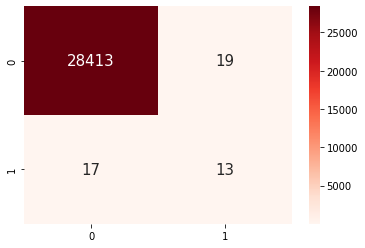

In [45]:
sns.heatmap(confusion_matrix(val_y, isolation_val_pred), fmt = 'd', annot = True, cmap = plt.cm.Reds,  annot_kws = {'size':15})

In [46]:
elliptic = EllipticEnvelope(support_fraction = 0.994, contamination = val_contamination, random_state = 42)
elliptic.fit(train_x)

EllipticEnvelope(contamination=0.0010551491277433877, random_state=42,
                 support_fraction=0.994)

In [47]:
pred = elliptic.fit_predict(train_x)

In [48]:
anom_index = np.where(pred == -1)
values = train_x.loc[anom_index]

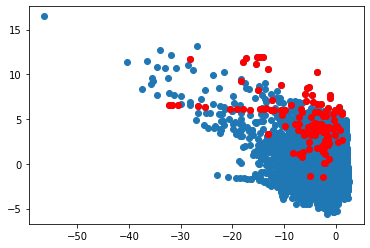

In [49]:
plt.scatter(train_x.iloc[:,0], train_x.iloc[:,3])
plt.scatter(values.iloc[:,0],values.iloc[:,3], color='r')
plt.show()

In [50]:
val_pred = elliptic.predict(val_x) # model prediction
elliptic_val_pred = get_pred_label(val_pred)
val_score = f1_score(val_y, elliptic_val_pred, average='macro')
print(f'Validation F1 Score : [{val_score}]')
print(classification_report(val_y, elliptic_val_pred))

Validation F1 Score : [0.8927516353661109]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.85      0.73      0.79        30

    accuracy                           1.00     28462
   macro avg       0.92      0.87      0.89     28462
weighted avg       1.00      1.00      1.00     28462



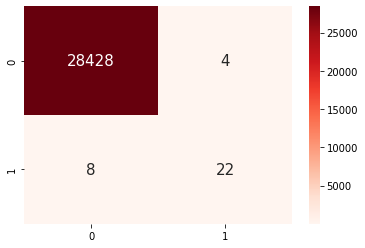

In [51]:
sns.heatmap(confusion_matrix(val_y, elliptic_val_pred), fmt = 'd', annot = True, cmap = plt.cm.Reds,  annot_kws = {'size':15})

# 이상치 제거

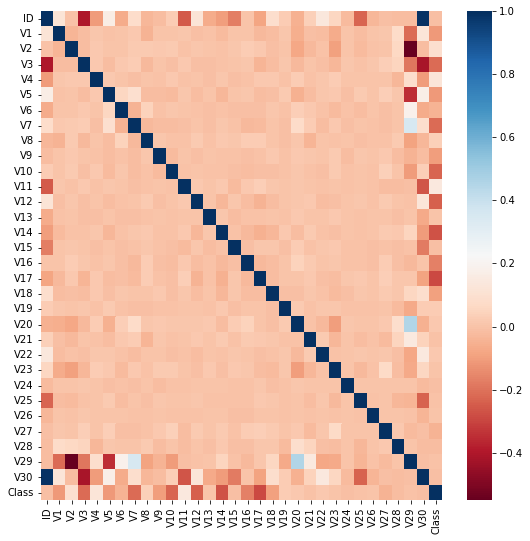

In [52]:
plt.figure(figsize = (9, 9))
corr = val_df.corr()
sns.heatmap(corr, cmap = 'RdBu')

양의 상관관계가 높을수록 색깔이 진한 파란색에 가까우며, 음의 상관관계가 높을수록 색깔이 진한 빨간색에 가깝게 표현된다.

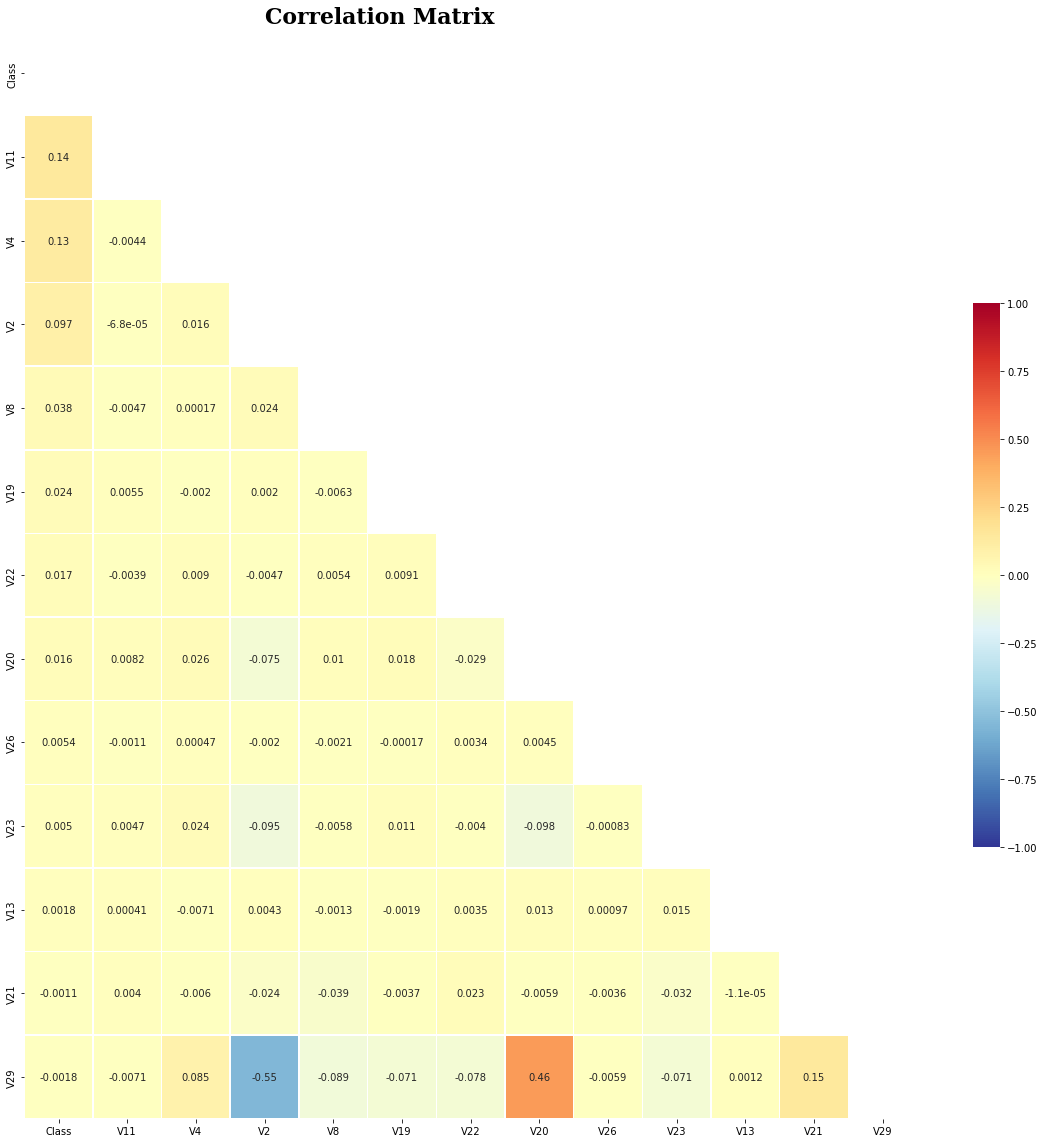

In [53]:
cor = val_df.corr()
fig, ax = plt.subplots( figsize=(20, 20))

k = 13 #number of variables for heatmap
cols = cor.nlargest(k, 'Class')['Class'].index
cm = np.corrcoef(val_df[cols].values.T)

mask = np.zeros_like(cm, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(cm, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1, vmax = 1, # 컬러바 범위 -1 ~ 1
            yticklabels=cols.values, 
            xticklabels=cols.values
           )  
ax.text(3.5,-0.1,"Correlation Matrix",fontsize=22, fontweight='bold', fontfamily='serif', color="#000000")
plt.show()

In [54]:
# 이상치 탐지 비율
def OutlierDetect(df):
    for col in train_df.iloc[:, 1:]:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        
        outliers = (df[col] < q1 - 1.5 * iqr) | (df[col] > q3 + 1.5 * iqr)
        print(col, '의 이상치의 비율: ', np.round(len(df[outliers]) / len(df), 2), "%")

In [55]:
OutlierDetect(train_df)

V1 의 이상치의 비율:  0.02 %
V2 의 이상치의 비율:  0.05 %
V3 의 이상치의 비율:  0.01 %
V4 의 이상치의 비율:  0.04 %
V5 의 이상치의 비율:  0.04 %
V6 의 이상치의 비율:  0.08 %
V7 의 이상치의 비율:  0.03 %
V8 의 이상치의 비율:  0.08 %
V9 의 이상치의 비율:  0.03 %
V10 의 이상치의 비율:  0.03 %
V11 의 이상치의 비율:  0.0 %
V12 의 이상치의 비율:  0.05 %
V13 의 이상치의 비율:  0.01 %
V14 의 이상치의 비율:  0.05 %
V15 의 이상치의 비율:  0.01 %
V16 의 이상치의 비율:  0.03 %
V17 의 이상치의 비율:  0.03 %
V18 의 이상치의 비율:  0.03 %
V19 의 이상치의 비율:  0.04 %
V20 의 이상치의 비율:  0.1 %
V21 의 이상치의 비율:  0.05 %
V22 의 이상치의 비율:  0.0 %
V23 의 이상치의 비율:  0.07 %
V24 의 이상치의 비율:  0.02 %
V25 의 이상치의 비율:  0.02 %
V26 의 이상치의 비율:  0.02 %
V27 의 이상치의 비율:  0.14 %
V28 의 이상치의 비율:  0.11 %
V29 의 이상치의 비율:  0.11 %
V30 의 이상치의 비율:  0.0 %


In [56]:
# 이상치 탐지
def get_outlier(df = None, column = None, weight = None):
  fraud = df[df['Class'] == 1][column]
  
  quantile_25 = np.percentile(fraud.values, 25)
  quantile_75 = np.percentile(fraud.values, 75)
  
  iqr = quantile_75 - quantile_25
  lowest_val = quantile_25 - iqr * weight
  highest_val = quantile_75 + iqr * weight
    
  outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
  return outlier_index

In [57]:
outlier_index = get_outlier(df = val_df, column = 'V14', weight = 3)
print('이상치 데이터 인덱스: ', outlier_index)

이상치 데이터 인덱스:  Int64Index([], dtype='int64')


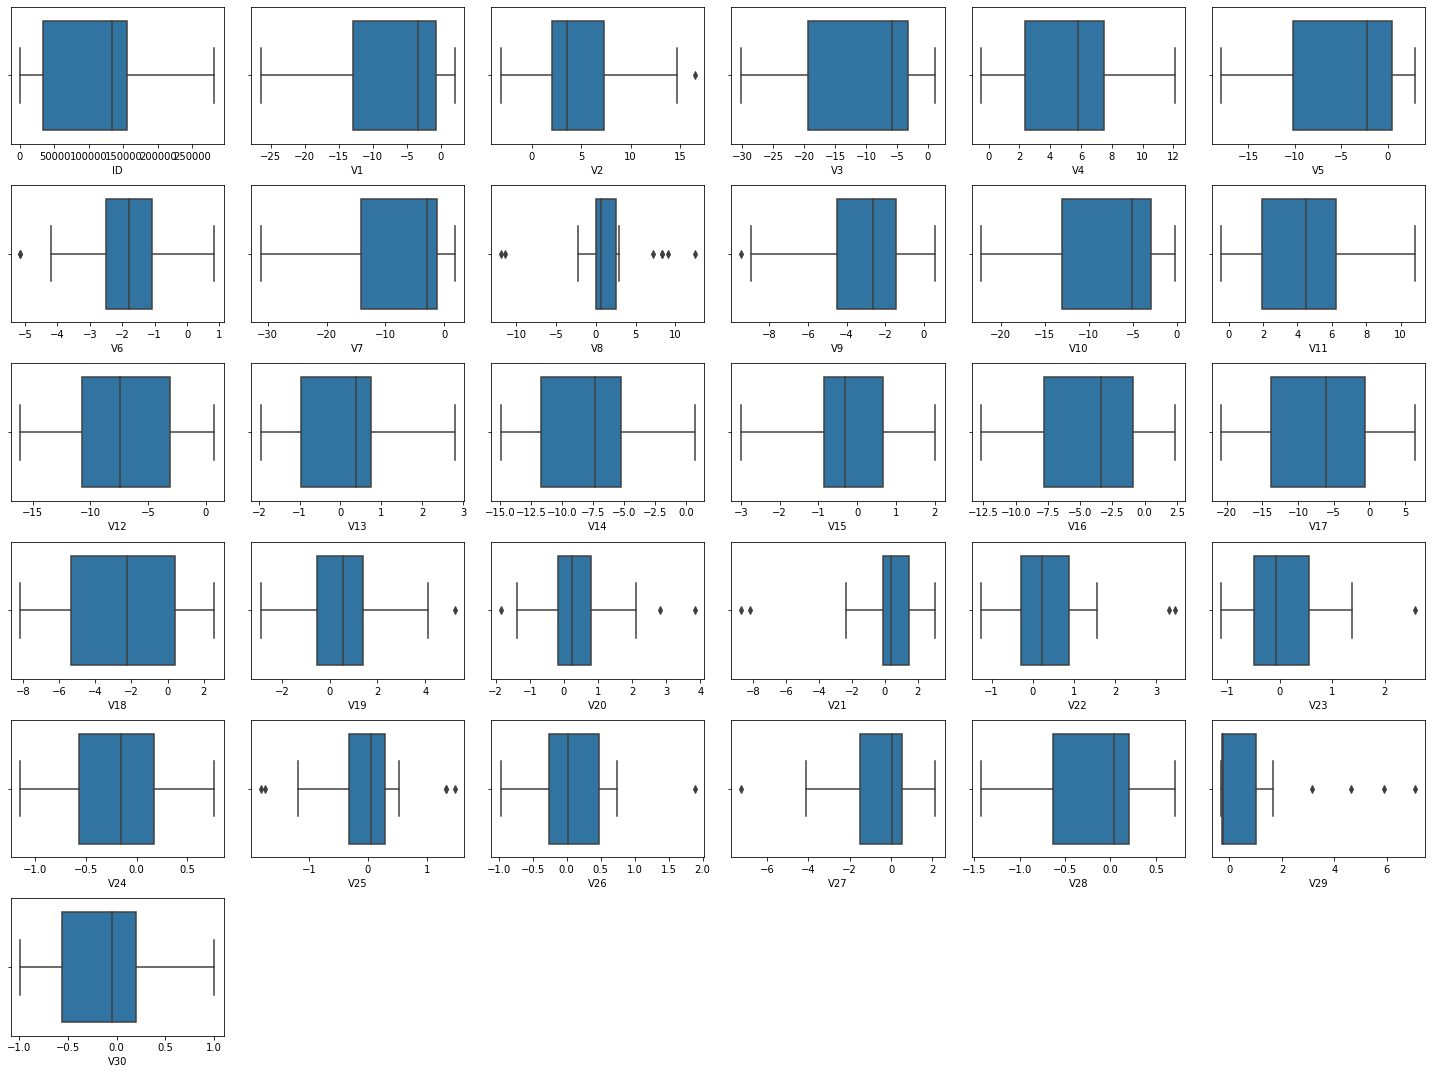

In [58]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(val_df.iloc[:, :-1].columns):
    plt.subplot(6, 6, i+1)
    sns.boxplot(val_df[val_df['Class'] == 1][col])
plt.tight_layout(True)

In [59]:
outlier_index = get_outlier(df = val_df, column = 'V8', weight = 3)
print('이상치 데이터 인덱스: ', outlier_index)

이상치 데이터 인덱스:  Int64Index([1547, 15054, 15345], dtype='int64')


In [60]:
def get_proprecessed_df(df = None):
  df_copy = df.copy()
  df_copy.drop(['ID'], axis = 1, inplace = True)

  outlier_index = get_outlier(df = df_copy, column = 'V14', weight = 1.5)
  df_copy.drop(outlier_index, axis = 0, inplace = True)
  return df_copy

In [62]:
from sklearn.model_selection import train_test_split

def get_train_test_dataset(df = None):
  df_copy = get_proprecessed_df(df)

  X_features = df_copy.iloc[:, :-1]
  y_target = df_copy.iloc[:, -1]

  X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size = 0.3, random_state = 0, stratify = y_target)
  return X_train, X_test, y_train, y_test

In [61]:
def get_model_train_eval(model, ftr_train = None, ftr_test = None, tgt_train = None, tgt_test = None):
  model.fit(ftr_train, tgt_train)
  pred = model.predict(ftr_test)
  pred = get_pred_label(pred)

  val_score = f1_score(tgt_test, pred, average = 'macro')
  print(f'Validation F1 Score: [{val_score}]')
  print(classification_report(tgt_test, pred))

In [63]:
X_train, X_test, y_train, y_test = get_train_test_dataset(val_df)

In [66]:
isolation = IsolationForest(n_estimators=150, max_samples = len(val_x), contamination=0.0011, random_state=0, verbose=0)
get_model_train_eval(isolation, ftr_train = X_train, ftr_test = X_test, tgt_train = y_train, tgt_test = y_test)

Validation F1 Score: [0.7497655608955573]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8530
           1       0.57      0.44      0.50         9

    accuracy                           1.00      8539
   macro avg       0.79      0.72      0.75      8539
weighted avg       1.00      1.00      1.00      8539



In [65]:
elliptic = EllipticEnvelope(support_fraction = 0.994, contamination = val_contamination, random_state = 42)
get_model_train_eval(elliptic, ftr_train = X_train, ftr_test = X_test, tgt_train = y_train, tgt_test = y_test)

Validation F1 Score: [0.8998827529604877]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8530
           1       0.73      0.89      0.80         9

    accuracy                           1.00      8539
   macro avg       0.86      0.94      0.90      8539
weighted avg       1.00      1.00      1.00      8539



# 스케일링

In [95]:
train_x2 = train_x.copy()

In [103]:
val_x = val_df.drop(columns = ['ID'])
val_x2 = val_x.copy()

In [96]:
pipeline = Pipeline([('standard', Normalizer()),
                     ('robust', RobustScaler())])

In [104]:
pipeline.fit(train_x2)
train_x2[train_x2.columns] = pipeline.transform(train_x2)

In [105]:
val_df_class = val_x2["Class"]
val_x2 = val_x2.drop(columns=["Class"])
val_x2[val_x2.columns] = pipeline.transform(val_x2)
val_x2["Class"] = val_df_class

In [99]:
val_x2

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,V29,V30,Class
0,-0.200313,1.075963,0.709967,-0.181398,0.585648,-0.061915,0.808468,0.143372,-0.818940,-0.452878,...,-0.903510,-0.505799,-0.754661,-0.174943,0.314060,2.201624,0.915952,-0.370294,-1.505419,0
1,0.325518,0.145409,-0.185150,1.098475,0.771684,1.423510,0.045165,0.780324,-0.784635,0.760978,...,0.331129,-0.090453,-1.540963,0.480507,0.375969,0.077729,-0.209796,0.146091,-0.892722,0
2,0.492295,0.383674,0.008124,1.704583,-0.031643,-0.698576,0.480528,-0.522834,-0.744366,0.972593,...,-0.134107,-0.219767,0.900337,1.010308,0.168717,-0.368225,0.046330,0.185144,-1.129183,0
3,0.359139,-0.272172,0.099960,0.332433,0.225500,1.558432,-0.415161,1.067647,0.222035,-0.127425,...,0.069289,0.335944,-1.283929,0.102039,0.723249,0.210615,-0.153059,0.326846,-1.021239,0
4,-0.517493,0.721553,0.236371,-0.608130,0.141679,-0.057915,0.753984,-1.473389,1.425831,2.826338,...,-0.082656,-0.178626,0.228897,0.063895,0.419004,-0.675590,-4.108040,-0.122067,-0.442229,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28457,-0.277085,1.193525,-0.316557,0.704452,0.532502,-0.347383,1.156062,0.575972,-1.065877,0.003747,...,0.942980,-0.643425,-0.001832,0.010928,-0.785094,2.326182,1.733023,0.254065,1.354923,0
28458,-0.404028,0.484139,-0.746002,-0.316995,0.927781,-0.583893,0.852293,0.952761,-0.729596,-1.607442,...,-0.558948,0.617865,0.921197,-0.417891,0.685801,-1.250564,-0.827103,1.061900,1.419734,0
28459,-0.208530,0.982731,-0.209459,0.683324,0.539206,-0.335420,1.246099,-2.222158,-0.342215,0.197865,...,0.333604,-0.487722,-0.105693,-0.006007,-0.645263,3.553499,2.121441,0.615582,1.239696,0
28460,1.098636,-0.215983,-0.980526,0.202031,0.034664,-0.575303,-0.017183,-0.334648,0.518825,0.487608,...,-0.956696,1.298761,-0.666270,-0.665119,0.551376,-0.689016,-0.965600,-0.365526,1.471177,0


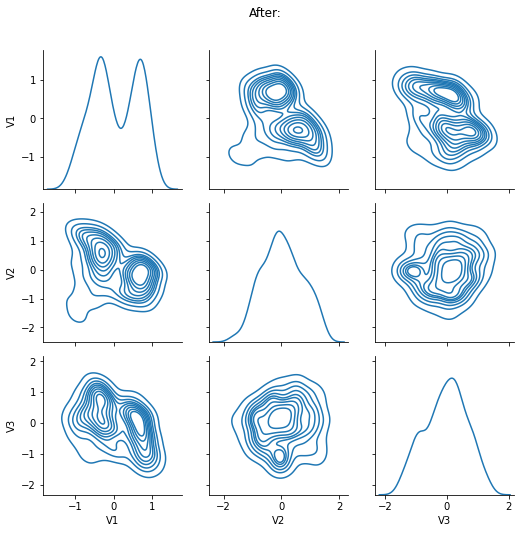

In [79]:
g = sns.PairGrid(pd.DataFrame(train_x2, columns=train_x2.columns).iloc[:,:3].sample(600, random_state=15))
plt.subplots_adjust(top=0.9)
g.fig.suptitle('After:')
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot);

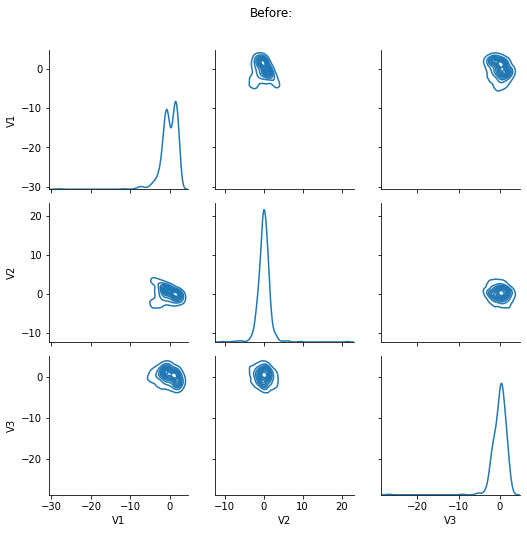

In [80]:
g = sns.PairGrid(train_df.drop(columns=["ID"]).iloc[:,:3].sample(600, random_state=15))
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Before:')
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot);

In [86]:
elliptic = EllipticEnvelope(support_fraction = 0.994, contamination = val_contamination, random_state = 42)
elliptic.fit(train_x2)

EllipticEnvelope(contamination=0.0010551491277433877, random_state=42,
                 support_fraction=0.994)

In [87]:
pred = elliptic.fit_predict(train_x2)

In [91]:
anom_index = np.where(pred == -1)
values = train_x2.loc[anom_index]

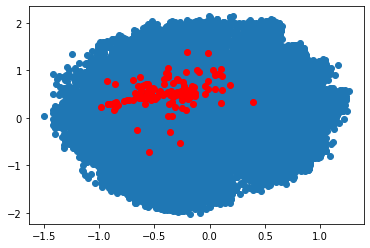

In [92]:
plt.scatter(train_x2.iloc[:,0], train_x2.iloc[:,3])
plt.scatter(values.iloc[:,0],values.iloc[:,3], color='r')
plt.show()

In [107]:
val_x = val_df.drop(columns=['ID', 'Class']) # Input Data
val_y = val_df['Class'] # Label

val_pred = elliptic.predict(val_x) # model prediction
val_pred = get_pred_label(val_pred)
val_score = f1_score(val_y, val_pred, average='macro')
print(f'Validation F1 Score : [{val_score}]')
print(classification_report(val_y, val_pred))

Validation F1 Score : [0.6961725409972995]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.26      0.83      0.39        30

    accuracy                           1.00     28462
   macro avg       0.63      0.92      0.70     28462
weighted avg       1.00      1.00      1.00     28462



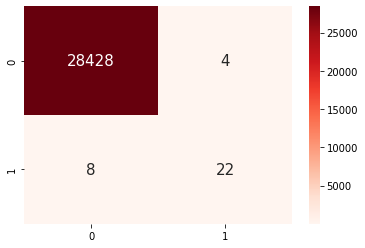

In [108]:
sns.heatmap(confusion_matrix(val_y, elliptic_val_pred), fmt = 'd', annot = True, cmap = plt.cm.Reds,  annot_kws = {'size':15})

# 원본 데이터 제출

In [ ]:
test_df = pd.read_csv("test.csv")
test_df.head()

In [ ]:
test_x = test_df.drop(columns=['ID'])

In [ ]:
test_pred = elliptic.predict(test_x) # model prediction
test_pred = get_pred_label(test_pred)

In [ ]:
submit = pd.read_csv('sample_submission.csv')

In [ ]:
submit['Class'] = test_pred
submit.to_csv('result2.csv', index=False)